In [21]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np


In [80]:

Ddir = "tau_mu_map_5x5/"

files = os.listdir(Ddir)

V_files = [i for i in files if "Vm" in i]

V_files = sorted(V_files,key= lambda x: (np.float32(x.split('_')[5]),np.float32(x.split('_')[7])))

S_files = [i for i in files if "States.txt" in i]

S_files = sorted(S_files,key= lambda x: (np.float32(x.split('_')[5]),np.float32(x.split('_')[7])))

mu = np.array([np.float32(x.split('_')[5]) for x in S_files])
taur = np.array([np.float32(x.split('_')[7]) for x in S_files])


In [81]:
print("List of noise levels and synaptic recovery time")

print("Noise levels (mu)",np.unique(mu))
print("Synaptic recovery time (tau_{rec})",np.unique(taur))

List of noise levels and synaptic recovery time
Noise levels (mu) [ 0.  3.  6.  9. 12. 15.]
Synaptic recovery time (tau_{rec}) [  0.  60. 120. 180. 240. 300.]


In [120]:
#Choosing mu and tau values for plotting
mui = 3.
tauri = 120.

#File choose
jj = np.where((mu==mui)&(taur==tauri))[0][0]


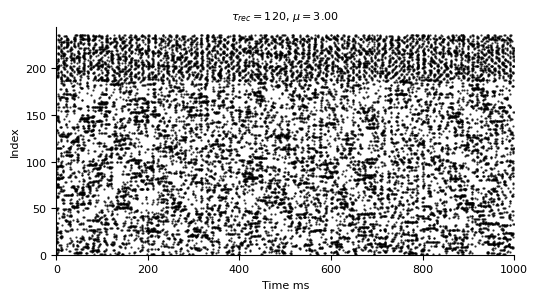

In [121]:
#fontsize
fs = 8

DatSt = pd.read_csv(Ddir+S_files[jj],header=None).values

tspE = np.where(DatSt[:,9:]==1)

#factor cm to inches
cm = 1./2.54

fig,axs = plt.subplots(1,1,figsize=(15*cm,7.5*cm))

#Number of excitataory neurons
Ne = 14*14

#Number of inhibitory neurons
Ni = 7*7

#axs.axhspan(Ne-1,Ni+Ne-1,color="blue",alpha=0.1)
#axs.axhspan(0,Ne-1,color="red",alpha=0.1)

axs.scatter(tspE[0],tspE[1]+1,s=2,alpha=0.8,marker="o",c='k',facecolor="k",lw=0.1)

axs.set_ylabel("Index",fontsize=fs)

axs.tick_params(labelsize=fs)
    
axs.spines[['top','right']].set_visible(False)

axs.set_xlabel("Time ms",fontsize=fs)

axs.set_ylim(0,Ni+Ne-1)

axs.set_xlim(0,len(DatSt))

axs.set_title(r"$\tau_{rec}=%3d$"%(tauri)+", "+r"$\mu=%2.2f$"%(mui) ,fontsize=fs)

plt.savefig("Raster_plot_neuronal_activity.png",dpi=500,bbox_inches="tight")


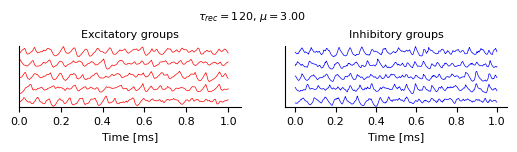

In [179]:
#Take the last Tt time steps
Tt = 25000

cm = 1./2.54

#Integration step
h = 4/100 #ms

#Time domain in seconds
tiempo = np.arange(0,Tt*h/1000,h/1000)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

cm = 1/2.54

fig = plt.figure(figsize=(16*cm, 2*cm))

outer = gridspec.GridSpec(1, 2, wspace=0.2, hspace=0.2)

cm = 1./2.54

inner = gridspec.GridSpecFromSubplotSpec(5, 1,
                subplot_spec=outer[0], wspace=0.1, hspace=0.1)

Vpot = pd.read_csv(Ddir+V_files[jj],header=None).values

for j in range(5):

    ax = plt.Subplot(fig, inner[j])
    
    #idx = np.where((tiempo>0.25)&(tiempo<=0.5))
    
    ax.plot(tiempo,Vpot[-Tt:,5+j]-np.mean(Vpot[:,5+j]),'r',lw=0.5)

    ax.set_yticks([])

    ax.tick_params(labelsize=8)

    if j==4:
        #plt.setp(ax.get_xticklabels(), visible=False)
        ax.set_xlabel("Time [ms]",fontsize=8)

    else:
        ax.set_xticks([])

    if j!=4:

        ax.spines[["top","bottom","right"]].set_visible(False)

    else:
        ax.spines[["top","right"]].set_visible(False)
    
    ax.set_xlim(0,1.06)
    #ax.set_ylim(-2,2)
    fig.add_subplot(ax)

    if j==0:
        ax.set_title("Excitatory groups",fontsize=fs)

inner = gridspec.GridSpecFromSubplotSpec(5, 1,
                subplot_spec=outer[1], wspace=0.1, hspace=0.1)

for j in range(5):

    ax = plt.Subplot(fig, inner[j])
    
    idx = np.where((tiempo>0.25)&(tiempo<=0.5))
    
    ax.plot(tiempo,Vpot[-Tt:,j]-np.mean(Vpot[:,j]),'b',lw=0.5)

    ax.set_yticks([])

    ax.tick_params(labelsize=8)

    if j==4:
        #plt.setp(ax.get_xticklabels(), visible=False)
        ax.set_xlabel("Time [ms]",fontsize=8)

    else:
        ax.set_xticks([])

    if j!=4:

        ax.spines[["top","bottom","right"]].set_visible(False)

    else:
        ax.spines[["top","right"]].set_visible(False)

    #ax.set_xlim(0.25,0.51)
    #ax.set_ylim(-.03,.03)
    
    fig.add_subplot(ax)

    if j==0:
        ax.set_title("Inhibitory groups",fontsize=fs)

plt.title(r"$\tau_{rec}=%3d$"%(tauri)+", "+r"$\mu=%2.2f$"%(mui),fontsize=fs,y=7,x=-0.15)

plt.savefig("Potential_channels.png",dpi=500,bbox_inches="tight")
